In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving used_cars_data.csv to used_cars_data.csv


In [3]:
data=pd.read_csv("used_cars_data.csv",index_col=0)

In [4]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


Removing String values from data


In [5]:
data["Power"]=data["Power"].str.replace("bhp","")
data["Engine"]=data["Engine"].str.replace("CC","")
data["Mileage"]=data["Mileage"].str.replace("kmpl","")
data["Mileage"]=data["Mileage"].str.replace("km/kg","")
data["New_Price"]=data["New_Price"].str.replace("Lakh","")
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,NaN,17.74


In [6]:
data.shape

(7253, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7207 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          1006 non-null   object 
 12  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(9)
memory usage: 793.3+ KB


Converting Data-Types

In [8]:
data['Mileage']=data['Mileage'].astype(float)
data['Engine']=pd.to_numeric(data['Engine'],errors="coerce")
data['Power']=pd.to_numeric(data['Power'],errors="coerce")
data['New_Price']=pd.to_numeric(data['New_Price'],errors="coerce")


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   float64
 8   Engine             7207 non-null   float64
 9   Power              7078 non-null   float64
 10  Seats              7200 non-null   float64
 11  New_Price          986 non-null    float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 793.3+ KB


Columns renaming


In [10]:
data=data.rename({"Engine":"Engine(CC)","Power":"Power(bhp)"},axis=1)
data.head()


,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,New_Price,Price
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,NaN,17.74


In [11]:
data.nunique()

Name                 2041
Location               11
Year                   23
Kilometers_Driven    3660
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               438
Engine(CC)            150
Power(bhp)            383
Seats                   9
New_Price             609
Price                1373
dtype: int64

Catergorical variables have more unique values

In [12]:
data.isnull().sum()


Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine(CC)             46
Power(bhp)            175
Seats                  53
New_Price            6267
Price                1234
dtype: int64

New_Price has more missing values, so that column can be ignored


In [13]:
data.drop("New_Price", inplace=True,axis=1)

In [14]:
data.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine(CC)', 'Power(bhp)',
       'Seats', 'Price'],
      dtype='object')

Getting current age of car from year of manufacture, so it will be useful for understanding


In [15]:
from datetime import date
date.today().year
data['Car_Age']=date.today().year-data['Year']
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,Price,Car_Age
S.No.,,,,,,,,,,,,,
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,13
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,8
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,12
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00,11
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,10


Seperating Brand and model from Name.


In [16]:
data["Brand"]=data.Name.str.split().str.get(0)
data["Model"]=data.Name.str.split().str.get(1)+data.Name.str.split().str.get(2)
data[["Name",'Brand','Model']]

,Name,Brand,Model
S.No.,,,
0,Maruti Wagon R LXI CNG,Maruti,WagonR
1,Hyundai Creta 1.6 CRDi SX Option,Hyundai,Creta1.6
2,Honda Jazz V,Honda,JazzV
3,Maruti Ertiga VDI,Maruti,ErtigaVDI
4,Audi A4 New 2.0 TDI Multitronic,Audi,A4New
...,...,...,...
7248,Volkswagen Vento Diesel Trendline,Volkswagen,VentoDiesel
7249,Volkswagen Polo GT TSI,Volkswagen,PoloGT
7250,Nissan Micra Diesel XV,Nissan,MicraDiesel


Deleting name and year



In [17]:
data.drop(["Name","Year"],inplace=True,axis=1)

In [18]:
data.columns

Index(['Location', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Mileage', 'Engine(CC)', 'Power(bhp)', 'Seats', 'Price',
       'Car_Age', 'Brand', 'Model'],
      dtype='object')

Data cleaning

In [19]:
data.Brand.unique()

array(['Maruti', 'Hyundai', 'Honda', 'Audi', 'Nissan', 'Toyota',
       'Volkswagen', 'Tata', 'Land', 'Mitsubishi', 'Renault',
       'Mercedes-Benz', 'BMW', 'Mahindra', 'Ford', 'Porsche', 'Datsun',
       'Jaguar', 'Volvo', 'Chevrolet', 'Skoda', 'Mini', 'Fiat', 'Jeep',
       'Smart', 'Ambassador', 'Isuzu', 'ISUZU', 'Force', 'Bentley',
       'Lamborghini', 'Hindustan', 'OpelCorsa'], dtype=object)

Treating Brand names as some of the names are not proper


In [20]:
searchfor=['Isuzu','ISUZU',"Mini",'Land']
data[data.Brand.str.contains('|'.join(searchfor))].head(5)

,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine(CC),Power(bhp),Seats,Price,Car_Age,Brand,Model
S.No.,,,,,,,,,,,,,
13,Delhi,72000,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,27.00,9,Land,RoverRange
14,Pune,85000,Diesel,Automatic,Second,0.00,2179.0,115.00,5.0,17.50,11,Land,RoverFreelander
176,Jaipur,8525,Diesel,Automatic,Second,16.60,1998.0,112.00,5.0,23.00,6,Mini,CountrymanCooper
191,Coimbatore,36091,Diesel,Automatic,First,12.70,2179.0,187.70,5.0,55.76,5,Land,RoverRange
228,Kochi,26327,Petrol,Automatic,First,16.82,1998.0,189.08,4.0,35.67,6,Mini,CooperConvertible


In [21]:
data["Brand"].replace({"ISUZU": "Isuzu", "Mini": "Mini Cooper","Land":"Land Rover"}, inplace=True)

In [22]:
data.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251.0,NaN,NaN,NaN,18.14158,4.562197,0.0,15.17,18.16,21.1,33.54
Engine(CC),7207.0,NaN,NaN,NaN,1616.57347,595.285137,72.0,1198.0,1493.0,1968.0,5998.0
Power(bhp),7078.0,NaN,NaN,NaN,112.765214,53.493553,34.2,75.0,94.0,138.1,616.0
Seats,7200.0,NaN,NaN,NaN,5.279722,0.81166,0.0,5.0,5.0,5.0,10.0
Price,6019.0,NaN,NaN,NaN,9.479468,11.187917,0.44,3.5,5.64,9.95,160.0


OBSERVATIONS:
1.Mumbai city has most sales.
2.Avg kms driven around 58k.
3.People prefer Diesel type, Manual and first owner cars over others.
4.Avg mileage is around 18.
5.Looks like engine, power and price data is skewed.
6.Avg seating capacity of car is 5.
7.People prefer maruti brand over others.
8.SwiftDzire is most preffered model.




Seperating Catergorical and numerical columns

In [23]:
cat_cols=data.select_dtypes(include=['object']).columns
num_cols=data.select_dtypes(include=np.number).columns.tolist()
print("categorical variables:")
cat_cols

num_cols

categorical variables:


['Kilometers_Driven',
 'Mileage',
 'Engine(CC)',
 'Power(bhp)',
 'Seats',
 'Price',
 'Car_Age']

Univariate analysis:

Kilometers_Driven
Skew: 61.58


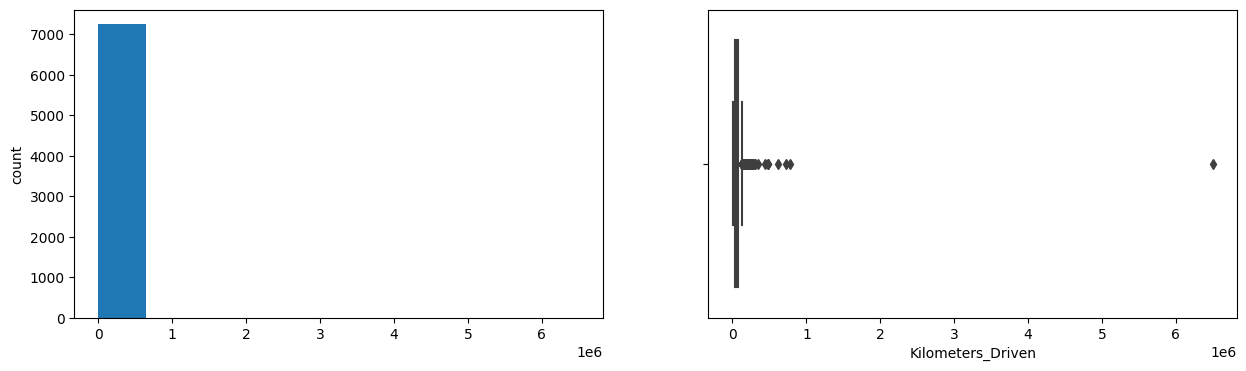

Mileage
Skew: -0.44


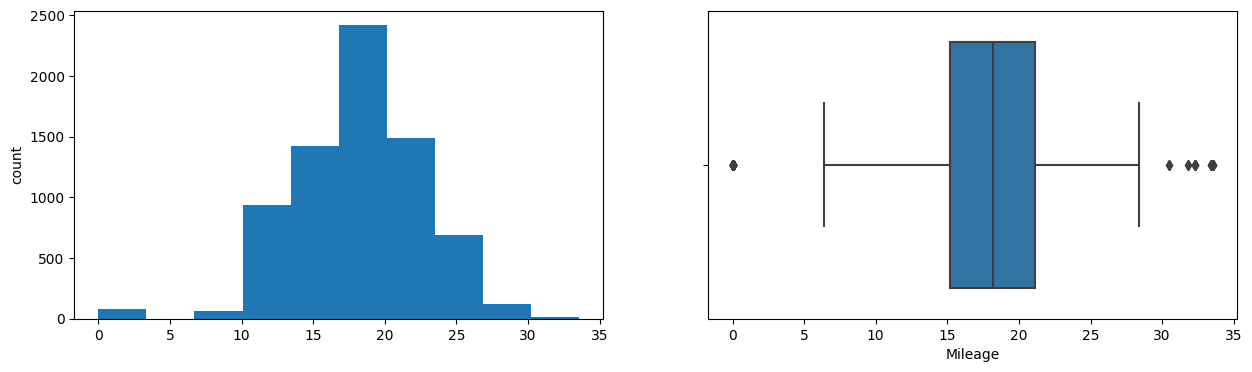

Engine(CC)
Skew: 1.41


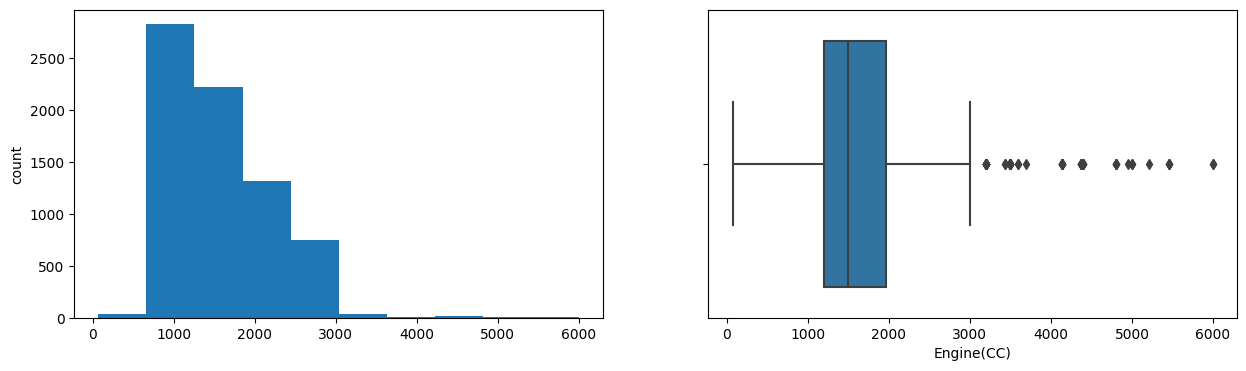

Power(bhp)
Skew: 1.96


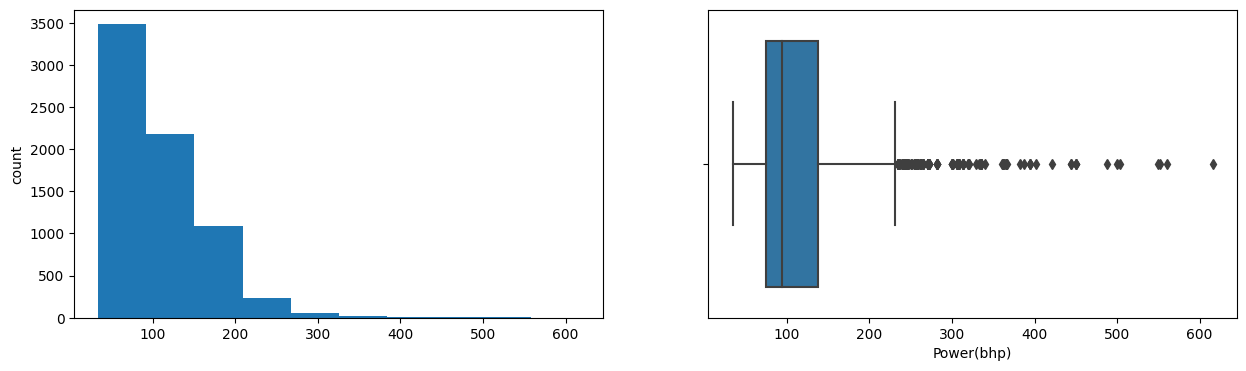

Seats
Skew: 1.9


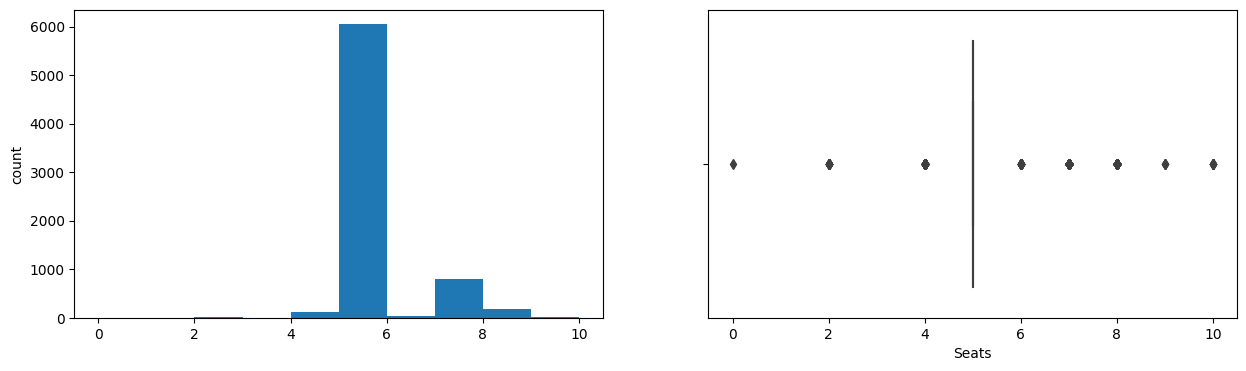

Price
Skew: 3.34


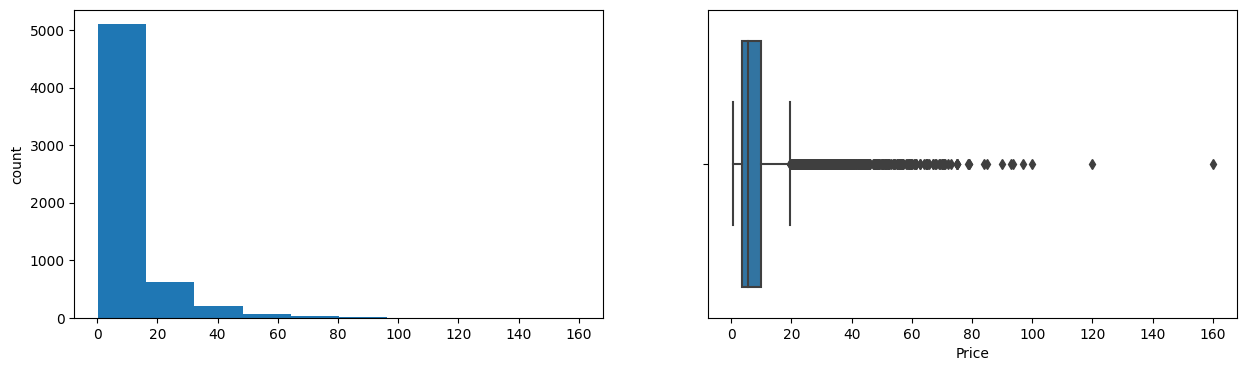

Car_Age
Skew: 0.84


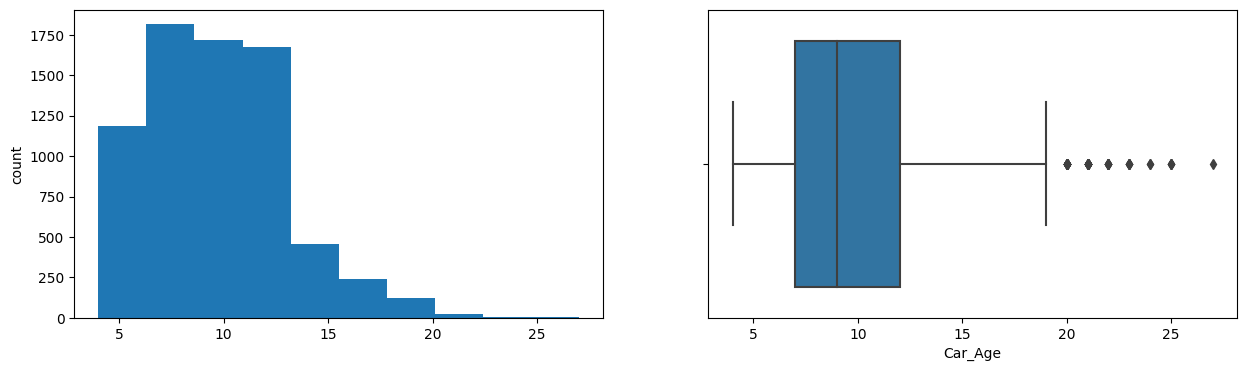

In [24]:
for col in num_cols:
  print(col)
  print("Skew:", round(data[col].skew(),2))
  plt.figure(figsize=(15,4))
  plt.subplot(1,2,1)
  data[col].hist(grid=False)
  plt.ylabel("count")
  plt.subplot(1,2,2)
  sns.boxplot(x=data[col])
  plt.show()

Price and Kilometers driven are highly skewed

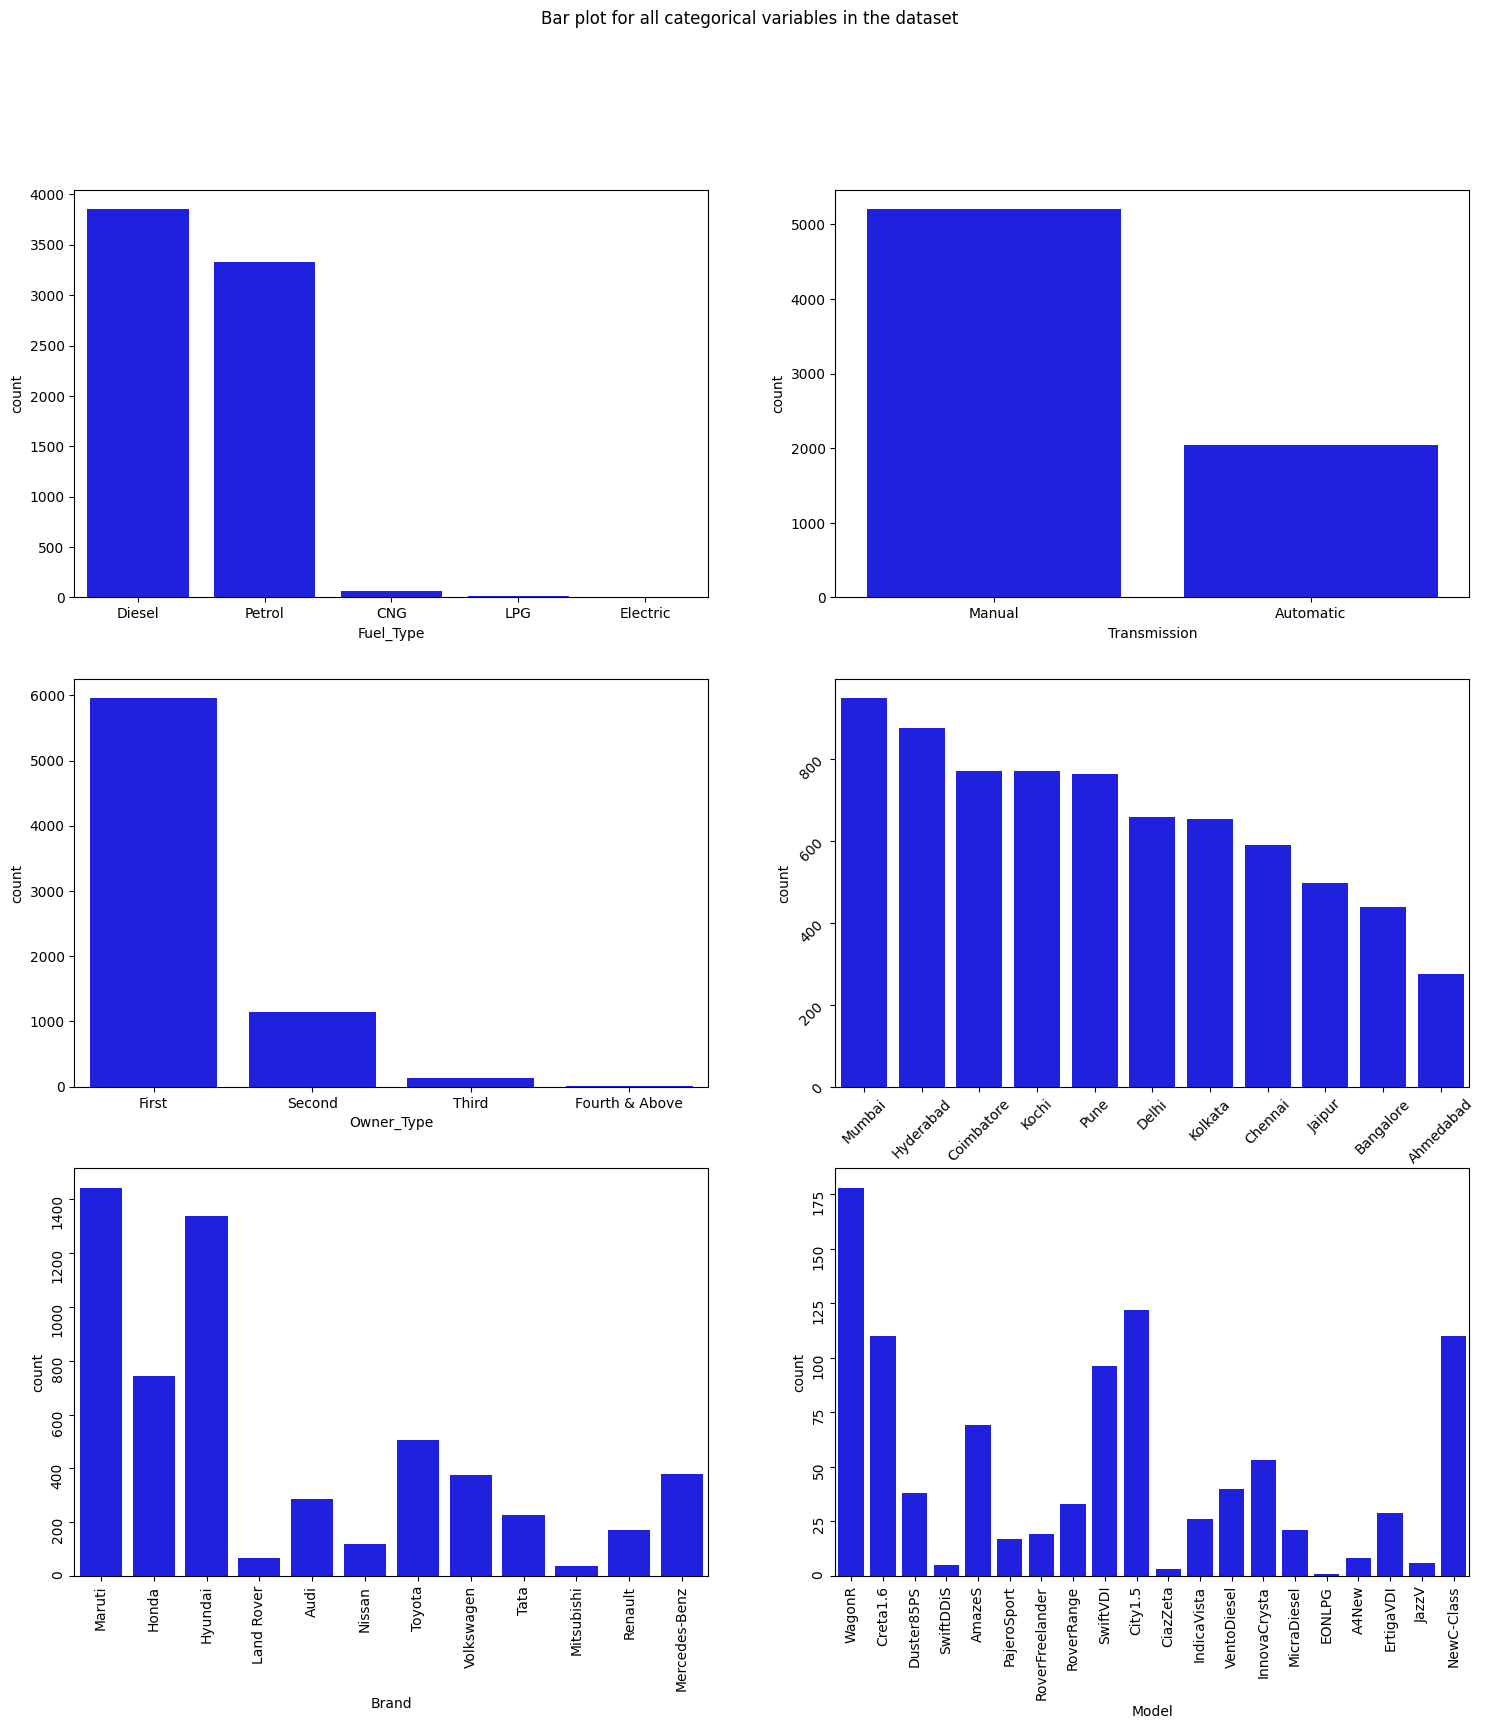

In [25]:
fig, axes = plt.subplots(3, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')
sns.countplot(ax = axes[0, 0], x = 'Fuel_Type', data = data, color = 'blue',
              order = data['Fuel_Type'].value_counts().index);
sns.countplot(ax = axes[0, 1], x = 'Transmission', data = data, color = 'blue',
              order = data['Transmission'].value_counts().index);
sns.countplot(ax = axes[1, 0], x = 'Owner_Type', data = data, color = 'blue',
              order = data['Owner_Type'].value_counts().index);
sns.countplot(ax = axes[1, 1], x = 'Location', data = data, color = 'blue',
              order = data['Location'].value_counts().index);
sns.countplot(ax = axes[2, 0], x = 'Brand', data = data, color = 'blue',
              order = data['Brand'].head(20).value_counts().index);
sns.countplot(ax = axes[2, 1], x = 'Model', data = data, color = 'blue',
              order = data['Model'].head(20).value_counts().index);
axes[1][1].tick_params(labelrotation=45);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);

From the above Graphs we can conclude hat:
1.Diesel and Manual type is preffered over others
2.People Prefer 1st owner type
3.Mumbai has highest number of cars for purchase
4.Maruti has most sales, and in that wagonr has highest sales


In [37]:
# Log transformation is done on columns Price and kilometers driven as they are highly skewed

# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
    data.info()

In [38]:
log_transform(data,['Kilometers_Driven','Price'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Location               7253 non-null   object 
 1   Kilometers_Driven      7253 non-null   int64  
 2   Fuel_Type              7253 non-null   object 
 3   Transmission           7253 non-null   object 
 4   Owner_Type             7253 non-null   object 
 5   Mileage                7253 non-null   float64
 6   Engine(CC)             7234 non-null   float64
 7   Power(bhp)             7189 non-null   float64
 8   Seats                  7230 non-null   float64
 9   Price                  6019 non-null   float64
 10  Car_Age                7253 non-null   int64  
 11  Brand                  7253 non-null   object 
 12  Model                  7252 non-null   object 
 13  Kilometers_Driven_log  7253 non-null   float64
 14  Price_log              6019 non-null   float64
dtypes: f

<Axes: xlabel='Kilometers_Driven_log', ylabel='Density'>

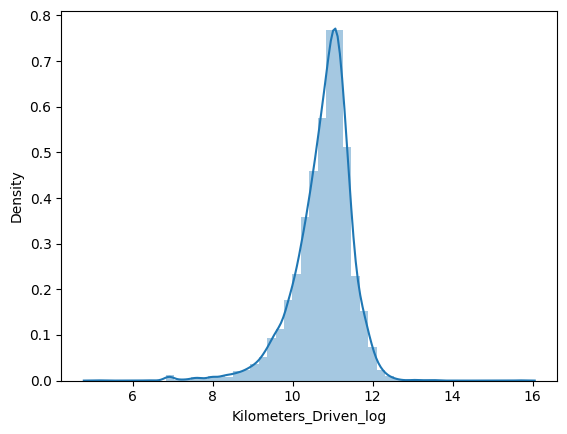

In [42]:
#Log transformation of the feature 'Kilometers_Driven'
sns.distplot(data["Kilometers_Driven_log"], axlabel="Kilometers_Driven_log")


<Figure size 1300x1700 with 0 Axes>

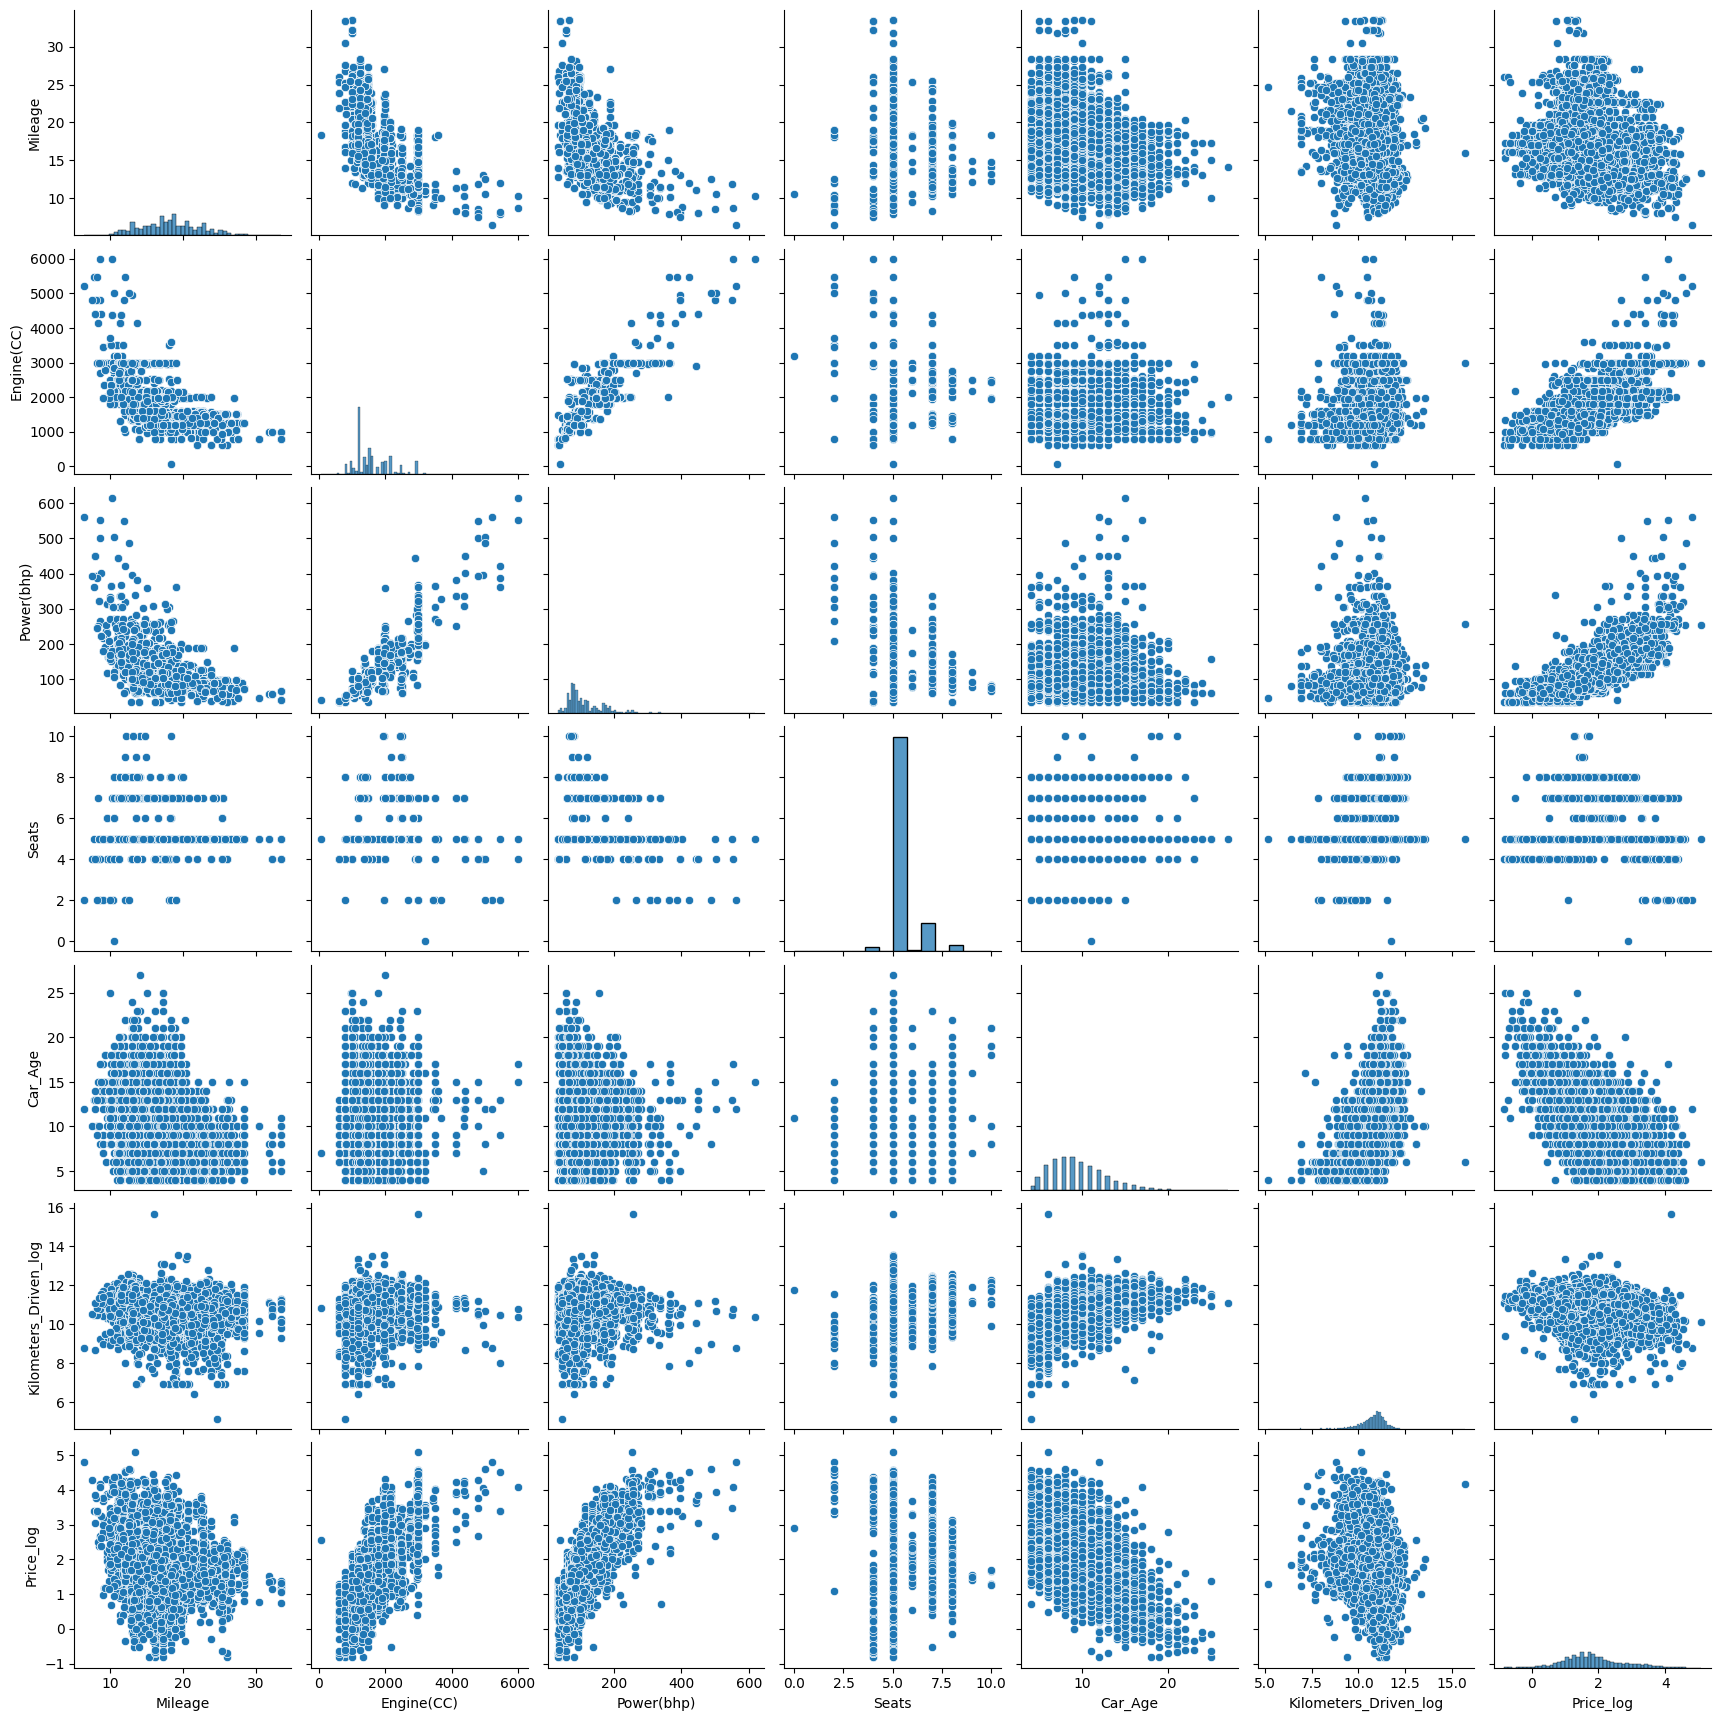

In [40]:
#Bi Variate analysis
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Kilometers_Driven','Price'],axis=1))
plt.show()

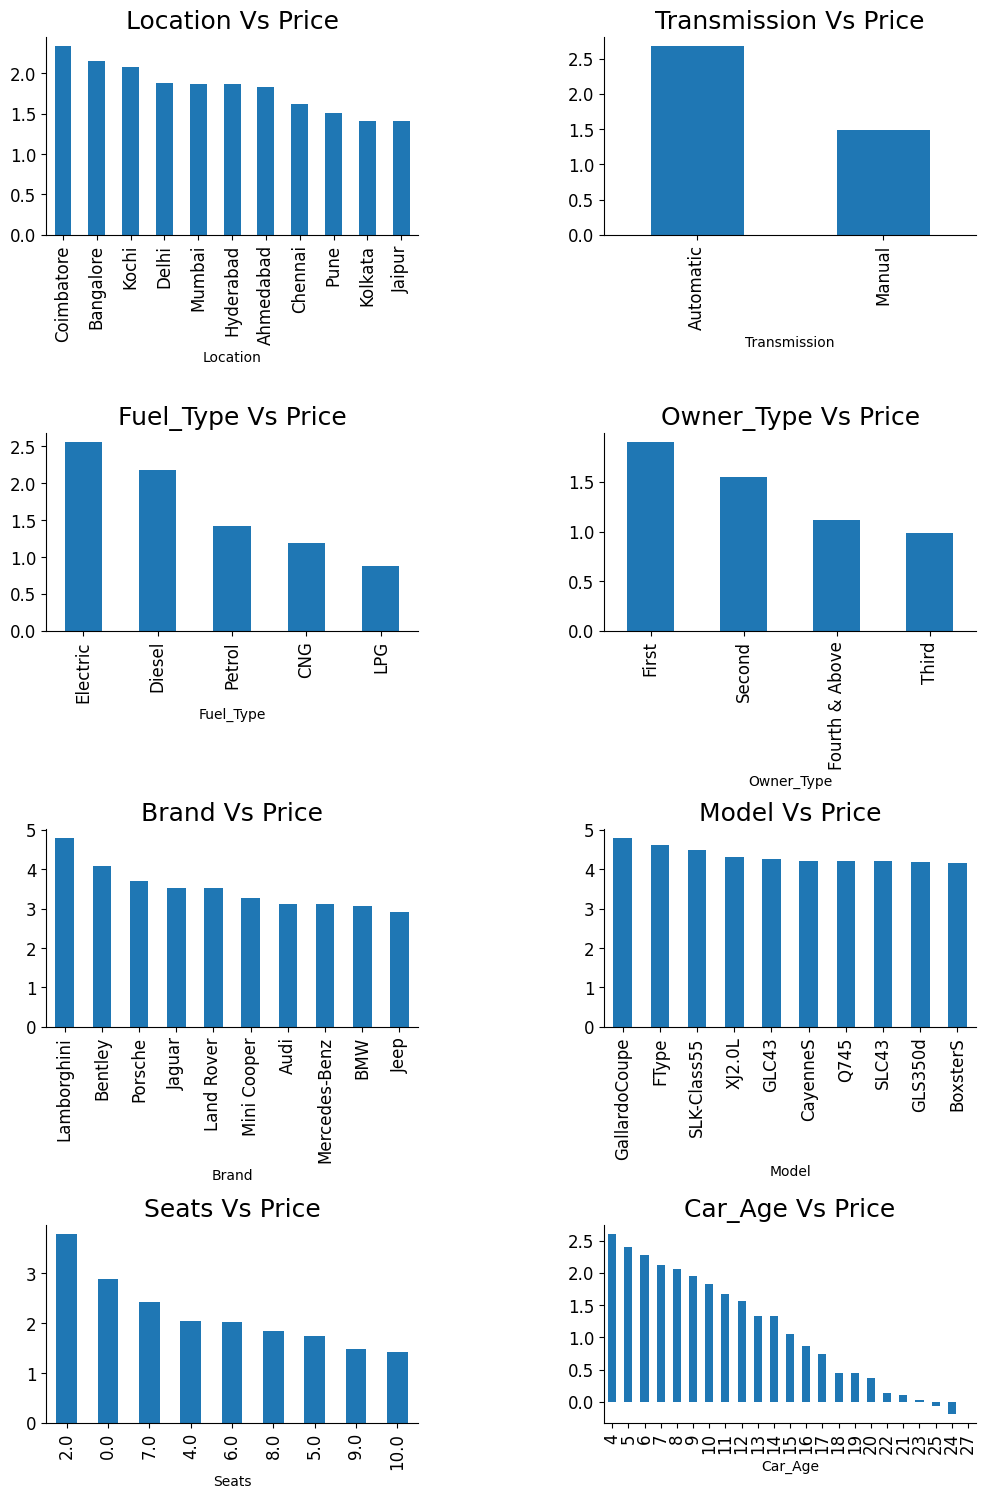

In [43]:
#A bar plot can be used to show the relationship between Categorical variables and continuous variables
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Location')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Location Vs Price", fontsize=18)
data.groupby('Transmission')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Transmission Vs Price", fontsize=18)
data.groupby('Fuel_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Fuel_Type Vs Price", fontsize=18)
data.groupby('Owner_Type')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("Owner_Type Vs Price", fontsize=18)
data.groupby('Brand')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Brand Vs Price", fontsize=18)
data.groupby('Model')['Price_log'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Model Vs Price", fontsize=18)
data.groupby('Seats')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Seats Vs Price", fontsize=18)
data.groupby('Car_Age')['Price_log'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Car_Age Vs Price", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

OBSERVATIONS:
1.The price of cars is high in Coimbatore and less price in Kolkata and Jaipur
2.Automatic cars have more price than manual cars.
3.Diesel and Electric cars have almost the same price, which is maximum, and LPG cars have the lowest price
4.First-owner cars are higher in price, followed by a second
5.The third owner’s price is lesser than the Fourth and above
6.Lamborghini brand is the highest in price
7.Gallardocoupe Model is the highest in price
8.Two Seater has the highest price followed by 7 Seater
9.The latest model cars are high in price

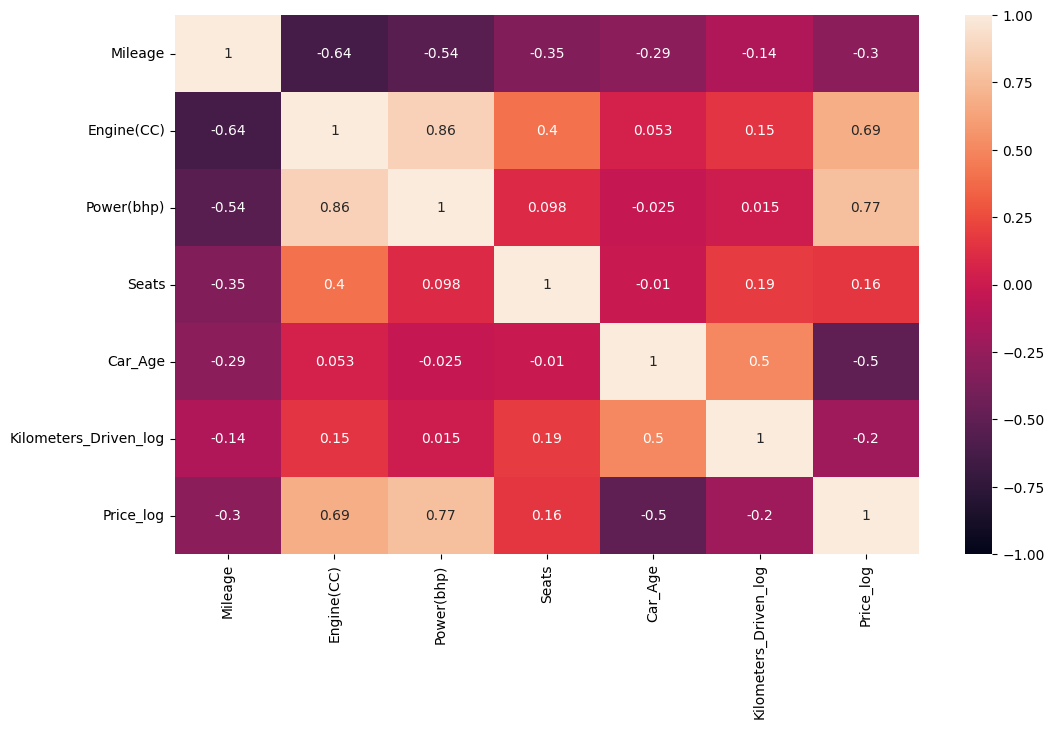

In [44]:
#Multivariate Analaysis

plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['Kilometers_Driven','Price'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

OBSERVATIONS:
1.The engine has a strong positive correlation to Power 0.86
2.Price has a positive correlation to Engine 0.69 as well Power 0.77
3.Mileage has correlated to Engine, Power, and Price negatively
4.Price is moderately Negative in correlation to car_age .
5.Kilometer driven has positive correlation to car_Age not much impact on the price
6.car Age is positively correlated to Kilometers-Driven as the Age of the car increases; then the kilometer will also increase of car has a negative correlation with Mileage this makes sense

In [47]:
#Missing value imputation
data.loc[data["Mileage"]==0.0,'Mileage']=np.nan
data.Mileage.isnull().sum()

0

In [46]:
data['Mileage'].fillna(value=np.mean(data['Mileage']),inplace=True)

In [48]:
data.Seats.isnull().sum()
data['Seats'].fillna(value=np.nan,inplace=True)
data['Seats']=data.groupby(['Model','Brand'])['Seats'].apply(lambda x:x.fillna(x.median()))
data['Engine(CC)']=data.groupby(['Brand','Model'])['Engine(CC)'].apply(lambda x:x.fillna(x.median()))
data['Power(bhp)']=data.groupby(['Brand','Model'])['Power(bhp)'].apply(lambda x:x.fillna(x.median()))

CONCLUSION:
1.Most of the customers prefer 2 Seat cars hence the price of the 2-seat cars is higher than other cars.
2.The price of the car decreases as the Age of the car increases.
3.Customers prefer to purchase the First owner rather than the Second or Third.
4.Due to increased Fuel price, the customer prefers to purchase an Electric vehicle.
5.Automatic Transmission is easier than Manual.